# KMeans Clustering Algorithm

In [1]:
#importing Basic Library
#Working on Mall DataSet
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("mall.csv") #loading Dataset
df.sample(5) #viewing randomm 5  data 

,INCOME,SPEND
69,209,163
232,289,145
274,275,118
48,216,115
176,230,160


In [3]:
#check null values
df.isnull().sum()

INCOME    0
SPEND     0
dtype: int64

In [4]:
#datatype
df.dtypes

INCOME    int64
SPEND     int64
dtype: object

In [5]:
#how many records
df.shape

(303, 2)

In [6]:
X=df.columns
X

Index(['INCOME', 'SPEND'], dtype='object')

In [7]:
#applying Scalling
from  sklearn.preprocessing import StandardScaler

In [8]:
#alying for loop
for col in X:
    #creating object
    ss=StandardScaler()
    df[col]=ss.fit_transform(df[[col]])

In [9]:
df.head()

,INCOME,SPEND
0,-0.253492,0.015443
1,0.097607,1.633471
2,-0.852427,0.977514
3,-0.191534,1.239897
4,2.245510,0.583939


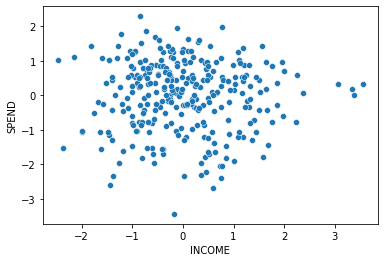

In [10]:
#visualizing by scatterplot
X1=df["INCOME"] #FIRST INPUT
X2=df["SPEND"] #SECOND INPUT
sns.scatterplot(X1,X2)
plt.show()

In [11]:
#Seleting the correct value of K
#we are going to use Elbow Method to find out Clusters ie K in this Dataset
from sklearn.cluster import KMeans

In [12]:
k_rng=range(1,21) #start=1 and stop=21-1=20 ,step=+1
#Declare Empty List for SSE(sum of squared error)
SSE=[] 
#Declare Empty List for K(no. of clusters) 
k_cluster=[]
for k in k_rng:
    #create object of KMeans class
    km=KMeans(n_clusters=k) #first time k=1 then k=2 .....
    #We train the model use fit() method
    km.fit(df[['INCOME','SPEND']])
    ##inertia_ inbuilt method of Kmeans class which calculate the sum of 
        #squared error
    #formula of SSE=sum(centerpoint-datapoint)^2
    SSE.append(km.inertia_) #append sse error in list SSE
    k_cluster.append(k) #append k in k_cluster list

In [13]:
#creating A datafarme of K and SSE
dic={"No of Cluster K":k_cluster,"Sum of Squared Error":SSE}
df1=pd.DataFrame(dic)
df1

,No of Cluster K,Sum of Squared Error
0,1,606.000000
1,2,401.224978
2,3,253.493524
3,4,199.395169
4,5,155.770025
5,6,131.205154
6,7,115.142119
7,8,102.150036
8,9,91.784196
9,10,81.556841


<AxesSubplot:>

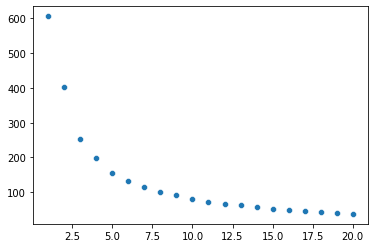

In [14]:
#visualization
sns.scatterplot(k_cluster,SSE)

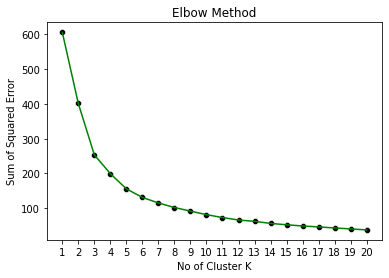

In [15]:
#visualization with help of df1
X=df1["No of Cluster K"]
Y=df1["Sum of Squared Error"]
sns.scatterplot(X,Y,color="black")
plt.plot(X,Y,color="green")
plt.xticks(X)
plt.title("Elbow Method")
plt.show()

In [16]:
#clear no. of cluser=5 to see above visualisation  in this dataset

In [17]:
#creating object of KMeans 
km=KMeans(n_clusters=5,random_state=1)
#passing value of k

In [18]:
Ypred=km.fit_predict(df[["INCOME","SPEND"]])

In [19]:
Ypred #to see if cluster given or not 
#here 0 means 1st cluster 1 means 2nd cluster

array([0, 3, 3, 3, 4, 1, 4, 0, 3, 3, 0, 0, 0, 1, 0, 3, 4, 1, 3, 0, 0, 3,
       3, 0, 3, 4, 3, 1, 4, 3, 3, 1, 3, 0, 1, 3, 4, 3, 0, 4, 4, 3, 0, 0,
       4, 4, 3, 0, 1, 0, 0, 4, 0, 3, 3, 3, 3, 3, 3, 4, 2, 4, 3, 1, 3, 3,
       0, 3, 3, 3, 0, 0, 3, 3, 3, 0, 0, 3, 3, 0, 3, 4, 4, 4, 2, 0, 0, 3,
       3, 2, 3, 3, 3, 4, 1, 1, 4, 0, 4, 3, 3, 0, 3, 3, 3, 1, 1, 0, 0, 0,
       4, 3, 2, 3, 0, 3, 3, 3, 3, 0, 2, 3, 0, 0, 3, 3, 1, 0, 3, 2, 3, 0,
       4, 0, 4, 0, 1, 1, 1, 2, 4, 4, 3, 0, 1, 0, 0, 3, 3, 1, 0, 1, 0, 0,
       0, 1, 3, 3, 0, 3, 3, 4, 3, 3, 3, 2, 1, 0, 0, 3, 0, 3, 4, 3, 1, 1,
       0, 4, 1, 2, 4, 1, 4, 3, 2, 4, 0, 2, 3, 3, 4, 1, 1, 0, 3, 4, 0, 0,
       2, 0, 3, 0, 2, 0, 1, 0, 0, 0, 1, 3, 0, 0, 1, 4, 0, 4, 2, 4, 2, 0,
       4, 1, 4, 2, 1, 1, 2, 1, 4, 2, 0, 2, 0, 2, 2, 4, 4, 4, 4, 0, 2, 0,
       1, 2, 1, 0, 4, 2, 3, 0, 2, 0, 2, 2, 2, 4, 2, 1, 0, 3, 3, 0, 2, 0,
       1, 1, 2, 1, 2, 2, 0, 0, 2, 0, 2, 3, 1, 0, 4, 1, 2, 3, 1, 3, 1, 2,
       3, 3, 4, 1, 3, 4, 0, 0, 1, 1, 1, 1, 2, 2, 1,

# Feature Engineering

In [20]:
#to add new column
df["TARGET"]=Ypred
df

,INCOME,SPEND,TARGET
0,-0.253492,0.015443,0
1,0.097607,1.633471,3
2,-0.852427,0.977514,3
3,-0.191534,1.239897,3
4,2.245510,0.583939,4
...,...,...,...
298,-0.088269,-1.165281,2
299,0.386748,-0.771706,2
300,-1.079609,-0.378132,1
301,-2.360090,-1.515125,1


In [21]:
#creating 5 dataframe according to Cluster
df0=df[df["TARGET"]==0]
df1=df[df["TARGET"]==1]
df2=df[df["TARGET"]==2]
df3=df[df["TARGET"]==3]
df4=df[df["TARGET"]==4]

In [22]:
df4

,INCOME,SPEND,TARGET
4,2.245510,0.583939,4
6,1.006335,0.146634,4
16,1.956370,0.977514,4
25,1.171559,0.540209,4
28,3.546644,0.321556,4
36,1.212865,0.890053,4
39,2.369428,0.059173,4
40,1.295476,-0.334401,4
44,1.563964,1.414819,4
45,1.646576,0.977514,4


In [23]:
df0.shape

(80, 3)

In [24]:
df1.shape

(51, 3)

In [25]:
df2.shape

(39, 3)

In [26]:
df3.shape

(86, 3)

In [27]:
df4.shape

(47, 3)

In [28]:
#finding centroid of df0 df1 df2 df3 df4
#use inbilt method cluster_centers defined in KMeans class
km.cluster_centers_

array([[ 0.10070512,  0.120396  ],
       [-1.01805523, -1.00236328],
       [ 0.66370889, -1.50951841],
       [-0.64637809,  0.96937799],
       [ 1.56528247,  0.36156508]])

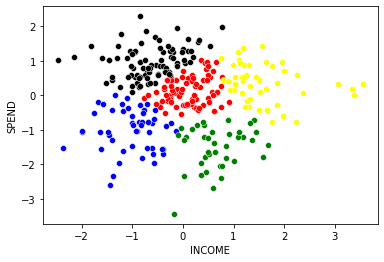

In [29]:
#visualizing
#use scatterlot
sns.scatterplot(df0["INCOME"],df0['SPEND'],color="red")
sns.scatterplot(df1["INCOME"],df1['SPEND'],color="blue")
sns.scatterplot(df2["INCOME"],df2['SPEND'],color="green")
sns.scatterplot(df3["INCOME"],df3['SPEND'],color="black")
sns.scatterplot(df4["INCOME"],df4['SPEND'],color="yellow")
plt.show()

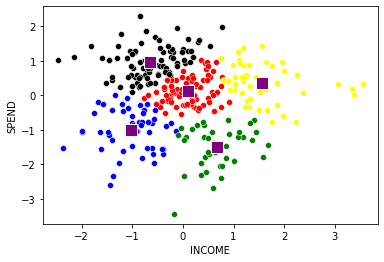

In [30]:
#visualizing
#use scatterlot 
#also show centroid of all dataframe
sns.scatterplot(df0["INCOME"],df0['SPEND'],color="red")
sns.scatterplot(df1["INCOME"],df1['SPEND'],color="blue")
sns.scatterplot(df2["INCOME"],df2['SPEND'],color="green")
sns.scatterplot(df3["INCOME"],df3['SPEND'],color="black")
sns.scatterplot(df4["INCOME"],df4['SPEND'],color="yellow")
sns.scatterplot(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color="purple",
                marker="s",s=150)
plt.show()